### En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

    - Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. 
    - En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste

Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [20]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene

from sklearn.preprocessing import StandardScaler


plt.rcParams["figure.figsize"] = (10,8) 

In [3]:
df = pd.read_pickle("./datos/possum_limpio.pkl")

### nuestra variable respuesta elegida es "totlngth" que hace referencia al largo total de nuestros sujetos. Ya teníamos analizada su distribución y sabemos que es normal, por varios métodos, por analisis visual y a través de la evaluación del p-valor obtenido en el test saphiro. 
### aquí repetimos los análisis para que consten. 

In [4]:
# test de shapiro --> p-valor superior a 0,05 aceptamos la H0, nuestra distribución es normal. 
stats.shapiro(df["totlngth"])

ShapiroResult(statistic=0.9839882850646973, pvalue=0.24401579797267914)

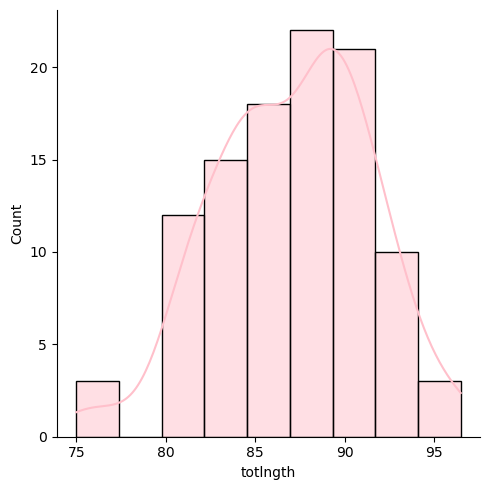

In [5]:
# representación visual de la distribución, mediante un displot. 
sns.displot(df["totlngth"], kde = True, color = "pink");

### En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

    - Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

    - Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [6]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [8]:
numericas.columns

Index(['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch',
       'eye', 'chest', 'belly'],
      dtype='object')

In [9]:
numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8
chest,104.0,27.000000,2.045597,22.0,25.500,27.00,28.000,32.0
belly,104.0,32.586538,2.761949,25.0,31.000,32.50,34.125,40.0


#### Estandarizar generalmente significa cambiar los valores de nuestras columnas de manera que la desviación estándar de la distribución sea igual a 1 y la media igual a 0. En *machine learning* esta aproximación se suele aplicar a las variables predictoras, es decir, lo que haremos será estandarizar todas nuestras variables predictoras(las que usaremos para intentar predecir determinado comportamiento). 

La estandarización se ejecta sobre las variables predictoras. en nuestro caso elegimos las siguientes: "hdlngth" y "taill", que hacen referencia al largo total de la cabeza de nuestros sujetos y al largo total de la cola, respectivamente. 
Vamos a aplicar dos métodos de estandarización, uno para cada una de nuestras variables. El primero será manual, aplicando la fórmula directamente y el segundo lo haremos utilizando el método Sklearn StandardScaler.

In [11]:
# Estandarización manual de la variable predictora "hdlngth"

# vamos a crear distintas variables con los estadísticos que necesitamos, media y desviacion estándar

media = numericas['hdlngth'].mean()
desviacion = numericas['hdlngth'].std() 

numericas['hdlngth_esta'] = (numericas['hdlngth'] - media) / desviacion


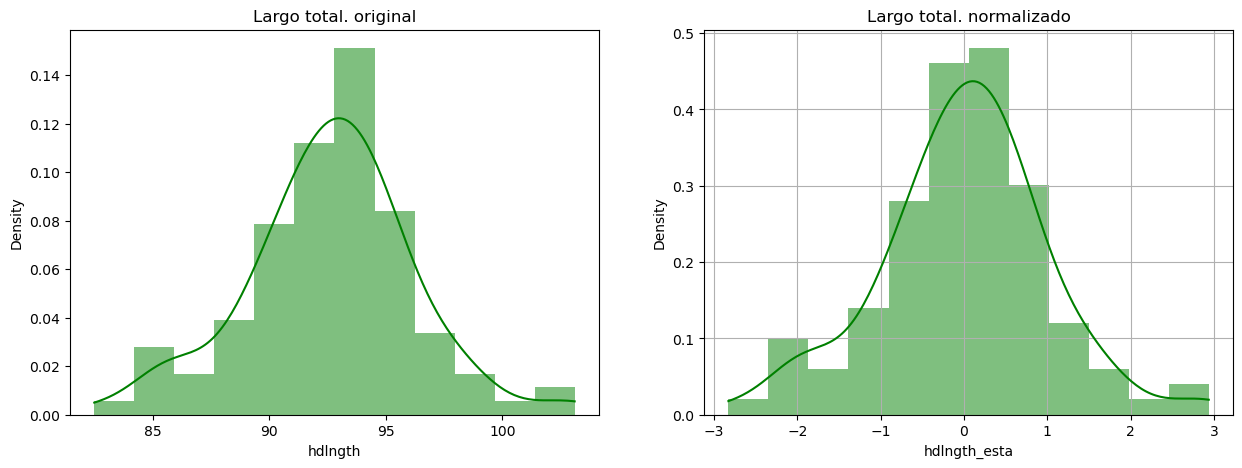

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Largo total. original')
axes[1].set_title('Largo total. normalizado')

sns.histplot(numericas['hdlngth'], ax = axes[0], color="green",  kde=True, stat="density", linewidth=0)
sns.histplot(numericas['hdlngth_esta'], ax = axes[1], color="green",  kde=True, stat="density", linewidth=0)

plt.grid()
plt.show();

In [19]:
# Recordemos que cuando estamos estadarizando lo que estamos haciendo es que la media de los datos sea igual a 0 
# y la desviación igual a 1. Chequeemos si eso es cierto: 

print(f'La media de la columna hdlngth_esta es:  {np.round(numericas["hdlngth_esta"].mean(),1)}')
print(f'La desviación estándar de la columna hdlngth_esta es: {np.round(numericas["hdlngth_esta"].std(),1)}')

La media de la columna hdlngth_esta es:  -0.0
La desviación estándar de la columna hdlngth_esta es: 1.0


### Falta estandarizar la variable "taill" . Quiero usar un sklearn StandardScaler, pero en los apuntes se lo aplica a todas las variables numéricas del df menos a la variable predictora... es esto correcto? CONSULTAR CON MI COMPAÑERA ANTES DE REALIZAR LA ESTANDARIZACIÓN

In [ ]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [ ]:
# de momento lo comento hasta no terminar la estandarización
# df.to_pickle("./datos/possum_normalizado.pkl")